In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly

"""
    lagrange_interpolation: 
     Encuentra el polinomio interpolador de 'f' en [a, b] usando polinomios de lagrange de orden n
     @param cheby: True si se usan nodos de chebyshev, de lo contrario equiespaciados
     @return (polinomio, (nodos_x, f(nodos_x)))
         Los coeficientes del polinomio son: [an,..., a1, a0] que el orden en que np.polyval() recibe los coeficientes 
"""
def lagrange_interpolation(a, b, n, f, cheby):
    if cheby:
        zj = [np.cos((2*j+1)/(2*(n+1))*np.pi) for j in range(n+1)]
        x_nodes = [(b+a)/2 + (b-a)/2*z for z in zj] 
    else:
        x_nodes = np.linspace(a, b, n + 1)
    y_nodes = [f(x) for x in x_nodes]
    # hay n+1 polinomios con n+1 coeficientes
    lag_pols = np.zeros((n + 1, n + 1)) 
    for k in range(len(x_nodes)):
        # Formamos el polinomio de lagrange k a partir de sus raices
        lag_roots = np.delete(x_nodes, k)
        lag_pols[k] = np.flip(poly.polyfromroots(lag_roots)) / np.prod(x_nodes[k] - lag_roots) * y_nodes[k]
        print(lag_pols[k])  # comentar si no se quieren ver los polinomios de Lagrange
    interp_poly = np.sum(lag_pols, axis=0)
    
    return (interp_poly, (x_nodes, y_nodes))

[  3.83172671 -10.92226399   7.37929893]
[ -6.85714286  24.         -18.10714286]
[  3.45821411 -14.34992536  14.52158865]
[ 0.43279797 -1.27218935  3.79374472]


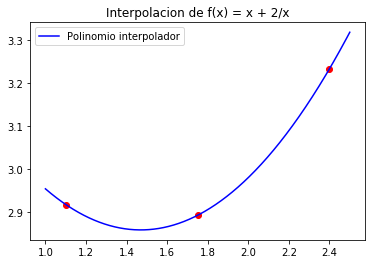

In [6]:
# Ejercicio 2: Interpolacion con nodos de chebyshev
# f(x) = x + 2/x
import matplotlib.pyplot as plt

n = 2
a = 1
b = 2.5
pol, nodes = lagrange_interpolation(a, b, n, 
                             lambda x: x + 2/x, True)

print(pol)

time = np.linspace(a, b, 1000)
plt.figure()
plt.plot(time, np.polyval(pol, time), label='Polinomio interpolador', color='b')
plt.scatter(nodes[0], nodes[1], marker='o', color='r')
plt.title(f'Interpolacion de f(x) = x + 2/x')
plt.legend()
plt.show()